## Integrantes:
- Luis Francisco Rodriguez Acevedo

## Implementar algoritmo de segmentación con K-Means usando SkLearns

In [2]:
!pip install altair

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


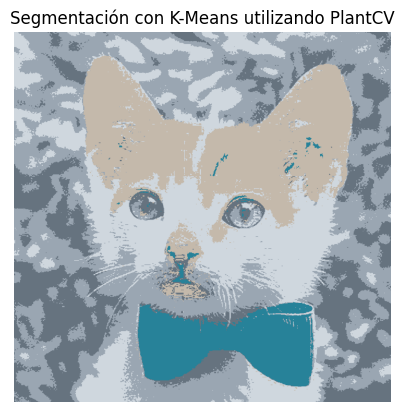

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

def kmeans_segmentation(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a espacio de color HSV
    img_rgb = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    # Paso 2: Desenvolver píxeles de imagen a lista de flotantes
    img_flat = img_hsv.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # Paso 3: Definir K
    kmeans = KMeans(n_clusters=n_clusters)

    # Paso 4: Encontrar los centros en el espacio HSV
    kmeans.fit(img_flat)
    centers = np.uint8(kmeans.cluster_centers_)

    # Paso 5: Segmentar cada píxel de la imagen y reemplazarlo por su centro
    segmented_image = centers[kmeans.labels_].reshape(img_hsv.shape)

    # Convertir la imagen de vuelta a RGB
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    return segmented_image_rgb, centers

# Ruta de la imagen a segmentar
image_path = '/content/cat2.png'

# Número de clusters
n_clusters = 5

# Segmentar la imagen
segmented_image, cluster_centers = kmeans_segmentation(image_path, n_clusters)

# Visualizar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmentación con K-Means utilizando PlantCV')
plt.show()

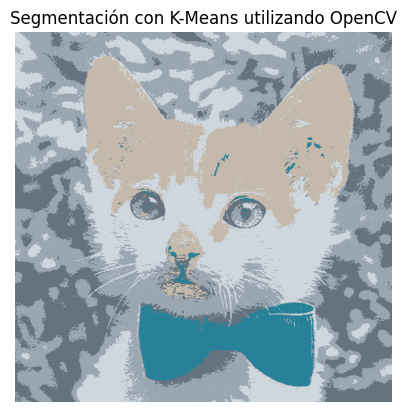

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def kmeans_segmentation_opencv(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a espacio de color HSV
    img_rgb = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    # Paso 2: Desenvolver píxeles de imagen a lista de flotantes
    img_flat = img_hsv.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # Paso 3: Definir los criterios de parada para cv.kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Paso 4: Aplicar K-Means
    _, labels, centers = cv2.kmeans(img_flat, n_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir los centros de los clusters a tipo de datos uint8
    centers = np.uint8(centers)

    # Paso 5: Segmentar cada píxel de la imagen y reemplazarlo por su centro
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img_hsv.shape)

    # Convertir la imagen de vuelta a RGB
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    return segmented_image_rgb, centers

# Ruta de la imagen a segmentar
image_path = '/content/cat2.png'

# Número de clusters
n_clusters = 5

# Segmentar la imagen
segmented_image, cluster_centers = kmeans_segmentation_opencv(image_path, n_clusters)

# Visualizar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmentación con K-Means utilizando OpenCV')
plt.show()


## Comparar resultados con implementación con OpenCV cv.kmeans()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


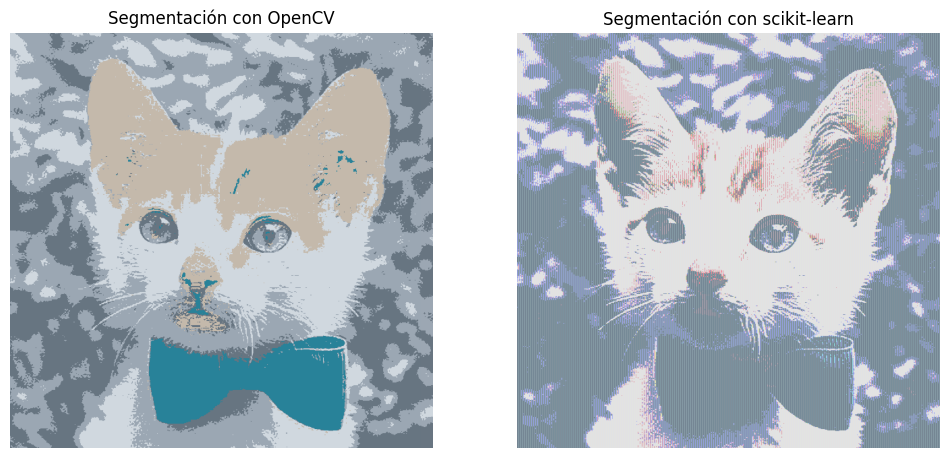

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

def kmeans_segmentation_opencv(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a espacio de color HSV
    img_rgb = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    # Paso 2: Desenvolver píxeles de imagen a lista de flotantes
    img_flat = img_hsv.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # Paso 3: Definir los criterios de parada para cv.kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Paso 4: Aplicar K-Means
    _, labels, centers = cv2.kmeans(img_flat, n_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir los centros de los clusters a tipo de datos uint8
    centers = np.uint8(centers)

    # Paso 5: Segmentar cada píxel de la imagen y reemplazarlo por su centro
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img_hsv.shape)

    # Convertir la imagen de vuelta a RGB
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    return segmented_image_rgb

def kmeans_segmentation_sklearn(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a matriz de píxeles
    img_rgb = plt.imread(image_path)

    # Paso 2: Aplicar K-Means con scikit-learn
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    img_flat = img_rgb.reshape((-1, 3))
    kmeans.fit(img_flat)

    # Obtener etiquetas y centros de clúster
    labels = kmeans.predict(img_flat)
    centers = kmeans.cluster_centers_

    # Segmentar la imagen
    segmented_image = centers[labels]
    segmented_image = segmented_image.reshape(img_rgb.shape)

    return segmented_image

# Ruta de la imagen a segmentar
image_path = '/content/cat2.png'

# Número de clusters
n_clusters = 5

# Segmentar la imagen con OpenCV y scikit-learn
segmented_image_opencv = kmeans_segmentation_opencv(image_path, n_clusters)
segmented_image_sklearn = kmeans_segmentation_sklearn(image_path, n_clusters)

# Visualizar las imágenes segmentadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image_opencv)
plt.axis('off')
plt.title('Segmentación con OpenCV')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_sklearn)
plt.axis('off')
plt.title('Segmentación con scikit-learn')

plt.show()
